In [36]:
# Import necessary packages
import numpy as np # Numerical computation package
import pandas as pd # Dataframe package
import matplotlib.pyplot as plt # Plotting package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Random Forest estimator
from sklearn.metrics import mean_absolute_error, mean_squared_error # Metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression # Logistic regression


np.random.seed(1) # Set the random seed for reproduceability

In [37]:
ped = pd.read_csv("data_clean_with_dummies.csv")
ped = ped.drop(["time", "Unnamed: 0"], axis = 1)

ped




,date,pedestrians count,temperature in ºc,holiday,school holiday,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,2018-05-01,0,-0.618529,1,0,0,0,0,0,0,...,-0.132511,0.807536,-0.289713,0.010727,-0.028418,0.002549,1.343752e-14,3.399769e-14,3.075825e-15,1.461271e-15
1,2018-05-01,0,-0.748505,1,0,0,0,0,0,0,...,-0.109464,0.811342,-0.292534,0.010451,-0.032451,0.002600,-9.024286e-15,-1.107488e-15,-7.856524e-15,1.973509e-15
2,2018-05-01,146,-0.748505,1,0,0,0,0,0,0,...,-0.110524,0.816247,-0.265368,-0.001012,-0.032903,0.002625,-8.541913e-15,-1.276913e-14,-2.278645e-15,6.954454e-15
3,2018-05-01,125,-0.748505,1,0,0,0,0,0,0,...,-0.081387,0.823020,-0.238997,0.005669,-0.029346,0.000894,-1.419155e-15,-3.141311e-15,2.985154e-15,4.863387e-16
4,2018-05-01,84,-0.878482,1,0,0,0,0,0,0,...,-0.071482,0.822965,-0.251573,0.009875,-0.031581,0.002593,1.384442e-16,4.592781e-15,-2.348245e-14,-1.436067e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15353,2020-01-31,5422,-0.228598,0,0,1,0,0,0,0,...,0.005758,0.033780,0.217939,0.014284,-0.100260,-0.000033,1.892448e-16,2.326196e-16,5.047854e-17,6.806943e-17
15354,2020-01-31,2691,-0.228598,0,0,1,0,0,0,0,...,0.034319,0.040229,0.236314,-0.002471,-0.063804,0.000330,2.723611e-16,3.684155e-16,5.409389e-17,1.261355e-16
15355,2020-01-31,1329,-0.358575,0,0,1,0,0,0,0,...,0.026225,0.033274,0.197274,-0.011857,0.010810,0.002537,-7.338219e-18,-1.275352e-16,1.749391e-17,-3.489961e-17
15356,2020-01-31,915,-0.228598,0,0,1,0,0,0,0,...,0.021063,0.014280,0.051855,-0.081064,0.231666,0.001812,1.645043e-16,9.648437e-17,5.501191e-17,5.675451e-17


In [38]:
# Define a new X with the squared feature k = 0.99, 57+46
X = np.array(ped[ped.columns[57:103]])

# Output to predict
y = ped["pedestrians count"]

# Split the dataset into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)



# Random Forest

In [39]:
ntrees = range(50, 301, 50) # Number of trees, more trees leeds to an error becuase of capasety reasons
# Instantiate lists to keep track of out-of-bag results
oob_mse = []
oob_mae = []
# Instantiate lists to keep track of out-of-sample results
oos_mse = []
oos_mae = []

In [40]:
i = 1
# Proceed with forest growing (this might take a while)
for trees in ntrees:
    # Instantiate the estimator (notice the cost-complexity pruning)
    # warm_start lets us continue growing the forest from the last instance
    forest = RandomForestRegressor(n_estimators=trees, ccp_alpha=0.01, 
                                   oob_score=True, warm_start=True, 
                                   random_state=144)
    print(i)
    i = i + 1  
    # Fit the model
    forest.fit(Xtrain, ytrain)
    # Store the out-of-bag MSE and MAE. Notice how it is on the TRAIN set
    oob_mse.append(mean_squared_error(ytrain, forest.oob_prediction_))
    oob_mae.append(mean_absolute_error(ytrain, forest.oob_prediction_))
    # Compute the out-of-sample MSE and MAE. Notice how it is on the VALIDATION set
    pred = forest.predict(Xtest) # Predict on validation set
    oos_mse.append(mean_squared_error(ytest, pred))
    oos_mae.append(mean_absolute_error(ytest, pred))

1
2
3


KeyboardInterrupt: 

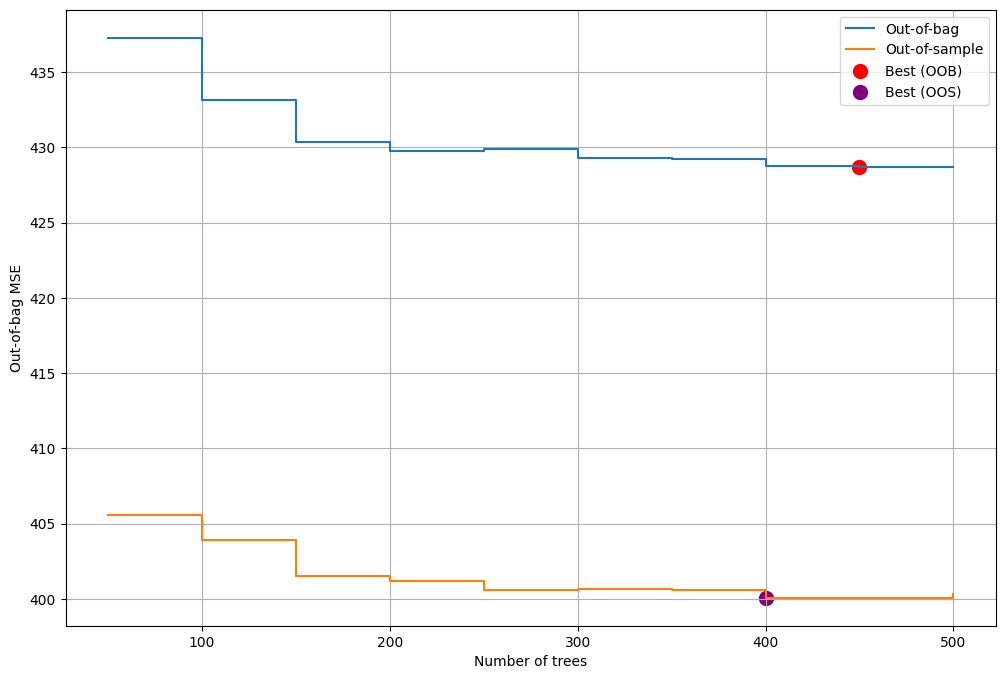

In [ ]:
# Time to visualize the results (this time, we plot the MAE)
fig, ax = plt.subplots(figsize=(12, 8))
# Compute best MAE (out-of-bag)
oob_best = np.argmin(oob_mae)
# Compute best MAE (out-of-sample)
oos_best = np.argmin(oos_mae)
# Plot out-of-bag error
ax.step(ntrees, oob_mae, where="post", label="Out-of-bag")
# Plot out-of-sample error
ax.step(ntrees, oos_mae, where="post", label="Out-of-sample")
# Plot best out-of-bag
ax.scatter(ntrees[oob_best], oob_mae[oob_best], s=100, color="red", label="Best (OOB)")
# Plot best out-of-sample
ax.scatter(ntrees[oos_best], oos_mae[oos_best], s=100, color="purple", label="Best (OOS)")
# Add axis labels, grid, legend
ax.set_xlabel("Number of trees")
ax.set_ylabel("Out-of-bag MAE")
ax.grid(True)
ax.legend()

In [ ]:
print("The best model (according to OOB selection) has :")
print(f" - A total number of {ntrees[oos_best]} trees")
print(f" - An out-of-sample mean absolute error of {oos_mae[oos_best]:>10.2f}")

The best model (according to OOB selection) has :
 - A total number of 450 trees
 - An out-of-bag mean absolute error of        428.67
 - An out-of-sample mean absolute error of     400.08


In [ ]:
forest = RandomForestRegressor(n_estimators=ntrees[oos_best], ccp_alpha=0.01, 
                                   oob_score=True, warm_start=True, 
                                   random_state=144)
# Fit the model
forest.fit(Xtrain, ytrain)
forestylist = forest.predict(Xtest)

In [ ]:
# Create the linear regression object
linreg = LinearRegression()
# Fit it to the training data
linreg.fit(Xtrain, ytrain)

values_linreg = linreg.predict(Xtest)



# Compute the errors
linr_mae_train = mean_absolute_error(ytrain, linreg.predict(Xtrain))
linr_mae_val = mean_absolute_error(ytest, linreg.predict(Xtest))

In [ ]:
# Create the logistic regression model
logreg = LogisticRegression()
# Fit it to the data
logreg.fit(Xtrain, ytrain)

values_logreg = logreg.predict(Xtest)


# Compute the errors
logr_mae_train = mean_absolute_error(ytrain, logreg.predict(Xtrain))
logr_mae_val = mean_absolute_error(ytest, logreg.predict(Xtest))

In [ ]:
# Print results
# print("----- Training data MAE -----")
# print(f"Linear regression MAE : {linr_mae_train:>10.2f}")
# print(f"Logistic regression MAE : {logr_mae_train:>10.2f}")
# print(f"Random forest MAE     : {oob_mae[oob_best]:>10.2f}")
# print() # Empty line
# print("----- Validation data MAE -----")
# print(f"Linear regression MAE : {linr_mae_val:>10.2f}")
# print(f"Logistic regression MAE : {logr_mae_train:>10.2f}")
# print(f"Random forest MAE     : {oos_mae[oob_best]:>10.2f}")

----- Training data MAE -----
Linear regression MAE :    1001.91
Logistic regression MAE :    1316.73
Random forest MAE     :     428.67

----- Validation data MAE -----
Linear regression MAE :    1005.74
Logistic regression MAE :    1316.73
Random forest MAE     :     400.08


In [ ]:
# The x-axis goes from 0 to 1, create a sequence from 0 to 1
xs = np.linspace(0, len(Xtest), num=len(Xtest))
# Create the y = a + mx line described above


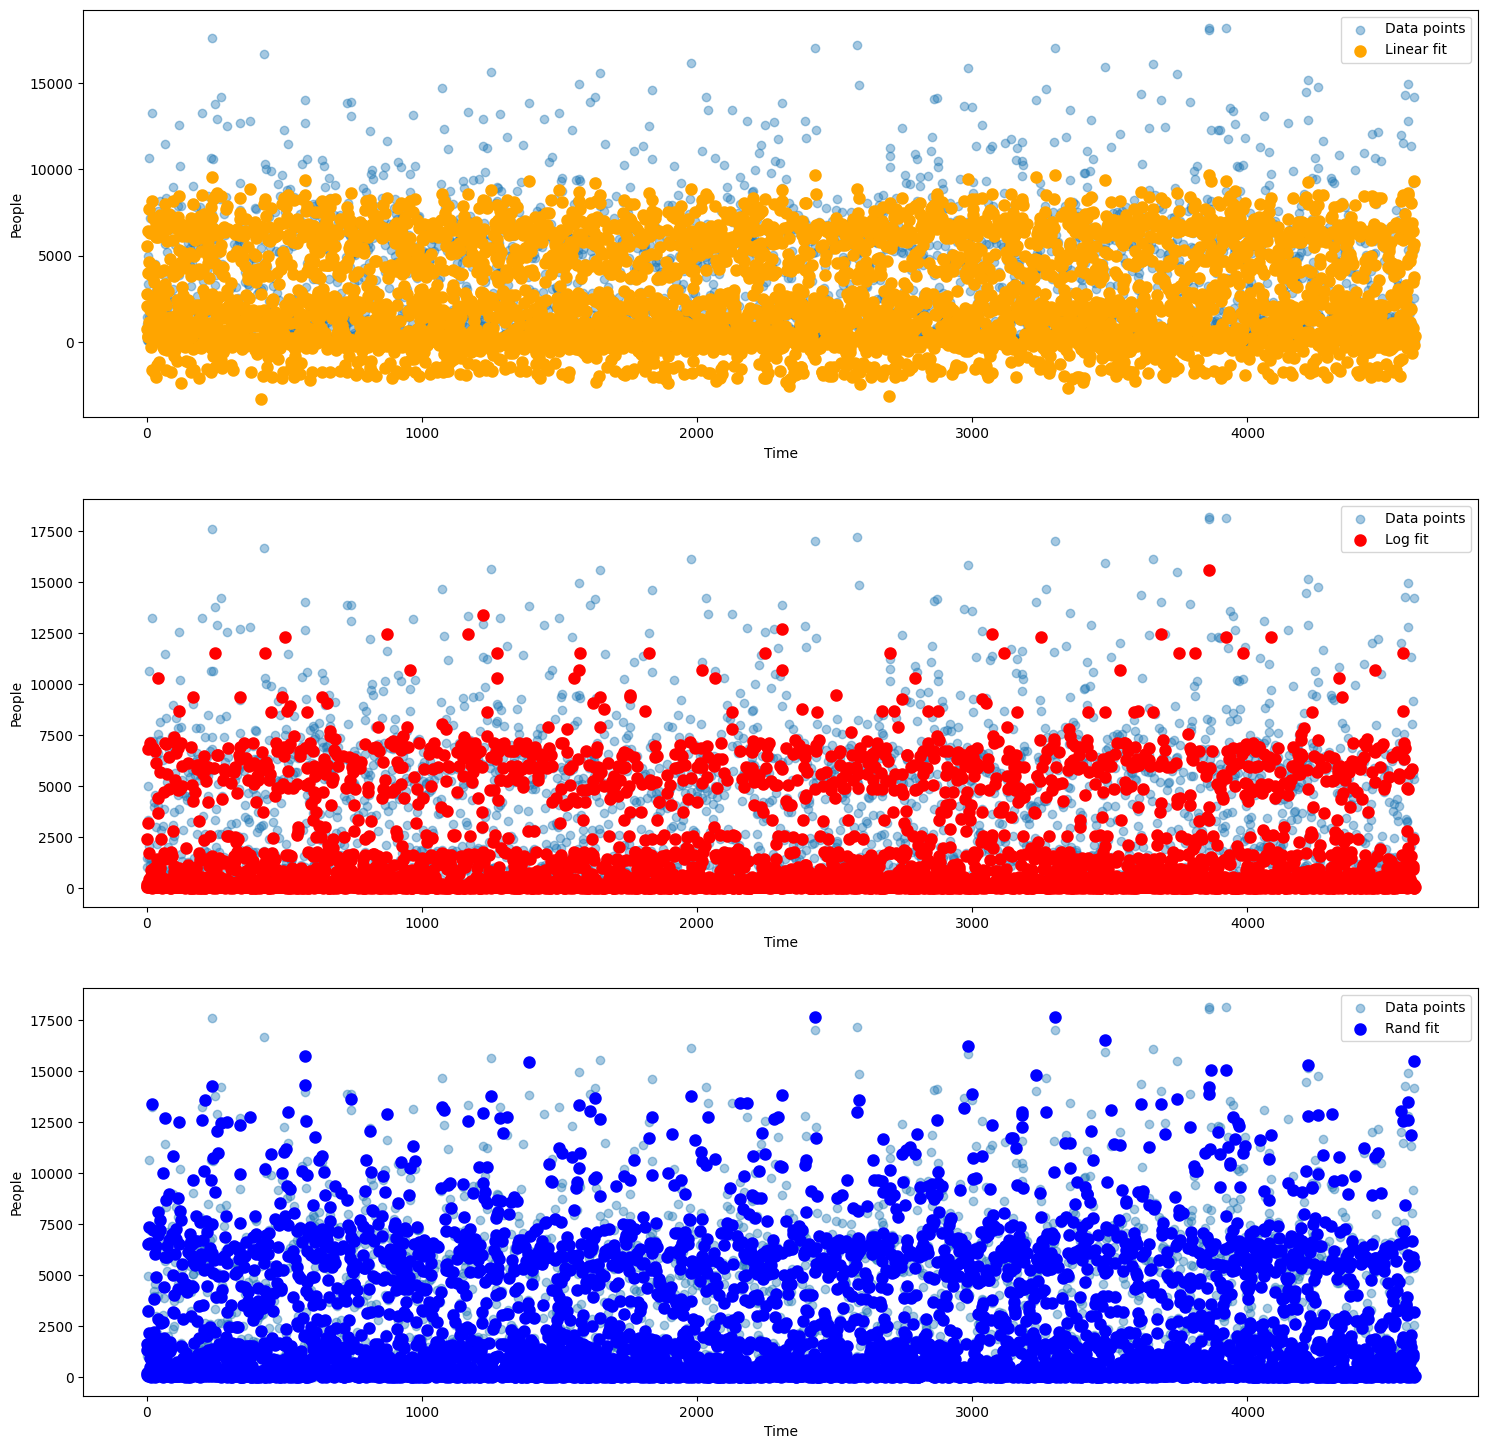

In [ ]:
# Set up the canvas
fig, axs = plt.subplots(3,1,figsize=(18, 18))
# Make a scatterplot with temperature on the x-axis and number of rentals on the y axis
for i in range(3):
    axs[i].scatter(xs, ytest, alpha=0.4, label="Data points")

axs[0].scatter(xs, values_linreg, label="Linear fit", color="orange", lw=3)
axs[1].scatter(xs, values_logreg, label="Log fit", color="red", lw=3)
axs[2].scatter(xs, forestylist, label="Rand fit", color="blue", lw=3)

# Add the predictions of our model using a scatter plot
# Add labels on the axes, a legend, and a grid
for i in range(3):
    axs[i].legend()
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("People")

# Selber Hypertuning

In [64]:
from sklearn.model_selection import GridSearchCV # Grid search function
# Number of trees in random forest
n_estimators = [int(x) for x in range(50, 501, 50)]
# Number of features to consider at every split
max_features = [0.25, 0.5, 1.0]
# Minimum number of samples required at each leaf node
min_samples_leaf = [0.1, 0.25, 1]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Method to controll complexity 
ccp_alpha = [0, 0.001, 0.01]

# Create the param grid
param_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "min_samples_leaf": min_samples_leaf,
               "ccp_alpha": ccp_alpha,
               "bootstrap": bootstrap}

forest = RandomForestRegressor()


In [46]:
from sklearn.model_selection import GridSearchCV
# Run grid search cross validation
grid_search_forest = GridSearchCV(estimator = forest, param_grid = param_grid, verbose=2, n_jobs = 4)
grid_search_forest.fit(Xtrain, ytrain)

array([[-3.28723616e-01, -3.70206184e-02,  7.50711700e-01, ...,
        -1.01024605e-01,  9.20148575e-02,  2.02265907e-01],
       [-5.18691142e-01, -8.46744873e-02, -1.24109228e-01, ...,
         3.24750779e-01,  1.10752760e-01, -1.90561838e-01],
       [-6.76096205e-01,  9.48807786e-01, -4.31405400e-01, ...,
        -3.89089713e-01,  7.45722316e-01, -6.72314221e-02],
       ...,
       [-9.79180026e-01,  5.80111586e-05, -4.54762405e-01, ...,
        -5.85609170e-02, -5.03358966e-02, -7.84867397e-02],
       [-8.21664661e-01,  8.04986730e-02,  3.04705913e-01, ...,
         1.30633763e-01,  3.56119975e-02,  8.01162340e-02],
       [ 8.54706035e-01,  5.21984518e-01, -4.20134920e-01, ...,
         2.93017425e-01, -2.35535020e-01,  1.44326074e-01]])

In [ ]:
forest.best_params_